# **Santander Coders 2023.2 | Ada Tech | Data Science**
## **Módulo II - Técnicas de Programação em Python I**
---
# **Projeto: Análise do Desmatamento no Brioma Amazônia**
# Autor: Carlos Silva

# **Fonte dos dados**
 A Amazônia é um bioma de extrema importância para a regulação climática global e a manutenção da biodiversidade. Contudo, nas últimas décadas, a região tem enfrentado desafios significativos relacionados ao desmatamento e às queimadas, ameaçando sua integridade ecológica e impactando ecossistemas cruciais. Com o objetivo de compreender e analisar esses fenômenos, este projeto busca explorar dados obtidos do Portal TerraBrasilis, oferecendo uma visão abrangente sobre a evolução temporal, a contribuição dos Estados e das Regiões brasileiras, bem como a classificação dos focos de queimada em diferentes tipos de vegetação. Os dados foram extraídos do Portal TerraBrasilis, disponível em: http://terrabrasilis.dpi.inpe.br/app/dashboard/fires/biomes/aggregated/#modal-container-download, acessados em: 27 Fev. 2024.

## **Referências**
 Assis, L. F. F. G.; Ferreira, K. R.; Vinhas, L.; Maurano, L.; Almeida, C.; Carvalho, A.; Rodrigues, J.; Maciel, A.; Camargo, C. TerraBrasilis: A Spatial Data Analytics Infrastructure for Large-Scale Thematic Mapping. ISPRS International Journal of Geo-Information. 8, 513, 2019. DOI: 10.3390/ijgi8110513.


 INSTITUTO NACIONAL DE PESQUISAS ESPACIAIS. COORDENAÇÃO GERAL DE OBSERVAÇÃO DA TERRA. PROGRAMA DE MONITORAMENTO DA AMAZÔNIA E DEMAIS BIOMAS. Avisos – Bioma Cerrado – Disponível em: http://terrabrasilis.dpi.inpe.br/downloads/. Acesso em: 10 jun. 2019.

---


In [ ]:
pip install geobr

# **1. Importação de bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import geobr
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="whitegrid")

# **2. Carregamento dos dados**

In [ ]:
# Upload do dataset:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADA TECH | TÉCNICAS DE PROGRAMAÇÃO I/dashboard-fires-month-27-02-2024-09 16 44.csv', encoding='utf-8', sep=';')
# Verificação do conjunto de dados:
display(df)

,date,class,focuses,uf
0,2020/12,Desmatamento Recente,86,TOCANTINS
1,2020/04,Floresta,50,TOCANTINS
2,2024/01,Desmatamento Consolidado,24,TOCANTINS
3,2019/12,Floresta,14,TOCANTINS
4,2024/01,Desmatamento Recente,11,TOCANTINS
...,...,...,...,...
1841,2020/06,Floresta,17,BAHIA
1842,2020/07,Desmatamento Consolidado,114,BAHIA
1843,2020/07,Floresta,53,BAHIA
1844,2020/07,Desmatamento Recente,106,BAHIA


# **3. Análise preliminar dos dados**
## 3.1. Número de linhas e colunas do *dataframe*

In [ ]:
print(f'O dataset apresenta {len(df.index)} linhas e {len(df.columns)} colunas, assim nomeadas:')
for column in df.columns:
    print(column)

O dataset apresenta 1846 linhas e 4 colunas, assim nomeadas:
date
class
focuses
uf


## 3.2. Descrição dos dados contidos nas colunas do *dataframe*
  Todas as colunas foram utilizadas nas análises.
  
3.2.1. **date**: ano e mês em que foram feitas as medições satelitais dos desmatamentos.

3.2.2. **class**: associa os focos de queimada em vegetação às áreas de floresta, desmatamento recente, desmatamento consolidado ou áreas de vegetação primária e vegetação secundária, conforme descrito a seguir:

a) **Desmatamento consolidado**: agrega todo o desmatamento já mapeado até o ano de 2019, usado para classificação a partir de novembro de 2023;

b) **Desmatamento recente**: base de dados PRODES agregando o desmatamento do ano de 2020, 2021 e 2022 e adicionando os dados de desmatamento do DETER entre 01 de agosto de 2022 e o último mês para o qual os dados já estejam completos;

c) **Floresta**: máscara de floresta afetada pelas queimadas.

d) **Outros**: tipos de biomas não considerados nas demais classificações.

e) **Vegetação primária**: máscara de vegetação primária do PRODES referente ao ano de 2021.

f) **Vegetação secundária**: máscara de vegetação secundária do TerraClass referente ao ano de 2022 para o bioma Amazônia

3.1.3. **focuses**: número de queimadas registradas por mês.

3.1.4. **uf**: Estado onde foram registradas as queimadas.

## 3.3. Limpeza e Preparação dos Dados

3.3.1. Características dos dados

O método .info() foi utilizado para obter as informações relevantes dos tipos de e *missing values*. As colunas 'date', 'class' e 'uf' apresentam dados do tipo *object* e a coluna 'focuses', do tipo *int64*. Constatou-se que não houve dados nulos e que o conjunto de dados apresenta 1846 linhas e 4 colunas.

In [ ]:
# Verificação das características dos dados
df.info()

# Verificando valores nulos
missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1846 non-null   object
 1   class    1846 non-null   object
 2   focuses  1846 non-null   int64 
 3   uf       1846 non-null   object
dtypes: int64(1), object(3)
memory usage: 57.8+ KB


date       0
class      0
focuses    0
uf         0
dtype: int64

3.3.2. Conversão de dados

Os dados da coluna 'date' foram convertidos para o tipo *datetime*.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Nova verificação das características dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1846 non-null   datetime64[ns]
 1   class    1846 non-null   object        
 2   focuses  1846 non-null   int64         
 3   uf       1846 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 57.8+ KB


3.3.3. Verificação de dados duplicados

Essa verificação foi realizada de duas formas, e ambas retornaram que não há dados duplicados no conjunto de dados.

In [ ]:
duplicates = df.drop_duplicates(inplace=True)
print(duplicates)

duplicates = df.duplicated()
duplicates.sum()

None


0

3.3.4. Inclusão de dados das Regiões do Brasil

Para realizar uma análise mais acurada das queimadas e desmatamentos, por Região do Brasil, foi incluída uma coluna no conjunto de dados, através de uma função para relacionar cada Estado com a sua respectiva Região.

In [65]:
def regiao(uf):
    regioes = {
        "Sul": ['PARANÁ', 'RIO GRANDE DO SUL', 'SANTA CATARINA'],
        "Sudeste": ['RIO DE JANEIRO', 'SÃO PAULO', 'MINAS GERAIS', 'ESPÍRITO SANTO'],
        "Centro Oeste": ['DISTRITO FEDERAL', 'GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL'],
        "Nordeste": ['BAHIA', 'ALAGOAS', 'MARANHÃO', 'CEARÁ', 'PERNAMBUCO', 'PARAÍBA', 'PIAUÍ', 'SERGIPE', 'RIO GRANDE DO NORTE'],
        "Norte": ['ACRE', 'AMAZONAS', 'AMAPÁ', 'PARÁ', 'RONDÔNIA', 'RORAIMA', 'TOCANTINS'],

    }
    for regiao, estados in regioes.items():
        if uf in estados:
            return regiao

regioes = pd.Series(df["uf"].apply(regiao), name="regiao")

if "regiao" not in df.columns:
    df = pd.concat([df, regioes], axis=1)

In [ ]:
# Nova verificação do conjunto de dados:
display(df)

,date,class,focuses,uf,regiao
0,2020-12-01,Desmatamento Recente,86,TOCANTINS,Norte
1,2020-04-01,Floresta,50,TOCANTINS,Norte
2,2024-01-01,Desmatamento Consolidado,24,TOCANTINS,Norte
3,2019-12-01,Floresta,14,TOCANTINS,Norte
4,2024-01-01,Desmatamento Recente,11,TOCANTINS,Norte
...,...,...,...,...,...
1841,2020-06-01,Floresta,17,BAHIA,Nordeste
1842,2020-07-01,Desmatamento Consolidado,114,BAHIA,Nordeste
1843,2020-07-01,Floresta,53,BAHIA,Nordeste
1844,2020-07-01,Desmatamento Recente,106,BAHIA,Nordeste


# **4. Análise exploratória dos dados**

## 4.1. Estatística descritiva
Essas estatísticas são referentes à variável (coluna) 'focuses' do conjunto de dados. Aqui está a análise correspondente:

1. **Contagem (Count):**
   - Número de observações (focos de queimada e desmatamento) no conjunto de dados: 1846.

2. **Média (Mean):**
   - A média dos valores de focos de queimada e desmatamento é aproximadamente 153,43.

3. **Desvio Padrão (Std):**
   - O desvio padrão é uma medida de dispersão dos valores em torno da média. No conjunto de dados, o desvio padrão é aproximadamente 321,89, indicando uma variabilidade considerável nos números de focos de queimada e desmatamento.

4. **Mínimo (Min):**
   - O valor mínimo de focos de queimada e desmatamento é 1.

5. **25º Percentil (25%):**
   - 25% dos valores de focos de queimada e desmatamento são iguais ou inferiores a 7,25.

6. **Mediana (50%):**
   - A mediana (ou 50º percentil) é 33. Este é o valor que separa a metade inferior da metade superior dos dados quando ordenados.

7. **75º Percentil (75%):**
   - 75% dos valores de focos de queimada e desmatamento são iguais ou inferiores a 131.

8. **Máximo (Max):**
   - O valor máximo de focos de queimada e desmatamento é 2837.

Essas estatísticas fornecem uma visão geral da distribuição dos focos de e desmatamento em termos de tendência central, dispersão e distribuição percentual. O desvio padrão relativamente alto indica uma variabilidade considerável nos dados. O intervalo entre os percentis (25%, 50%, 75%) destaca como os dados estão distribuídos em diferentes partes da escala. O valor máximo indica a presença de outliers ou pontos extremos no conjunto de dados.

In [125]:
df.describe()

,focuses
count,1846.000000
mean,153.430661
std,321.888464
min,1.000000
25%,7.250000
50%,33.000000
75%,131.000000
max,2837.000000


## 4.2. Evolução da série temporal

Um gráfico de série temporal é uma representação visual de dados coletados ou observados ao longo do tempo. Ele exibe a relação entre uma variável específica e o tempo, permitindo a análise de padrões, tendências e variações temporais nos dados.

No caso específico deste projeto, o gráfico mostra a evolução e o comportamento das queimadas, no período de 2019 a 2024. Essa visualização ajuda a identificar tendências ao longo do tempo, como aumentos no número das queimadas em torno dos meses de julho a setembro de cada ano analisado. Nessa série, também é possível observar que há diminuições consistentes na variável em estudo, nos meses de novembro a março, que correspondem aos mais chuvosos no país. Essas tendências podem fornecer insights importantes sobre o comportamento dos dados.

A detecção de padrões sazonais exibidos, ou seja, variações regulares associadas a períodos específicos do ano, sugere a necessidade de intensificação de programas de governo, a fim de mitigar a incidência de desmatamento nos meses menos chuvosos.

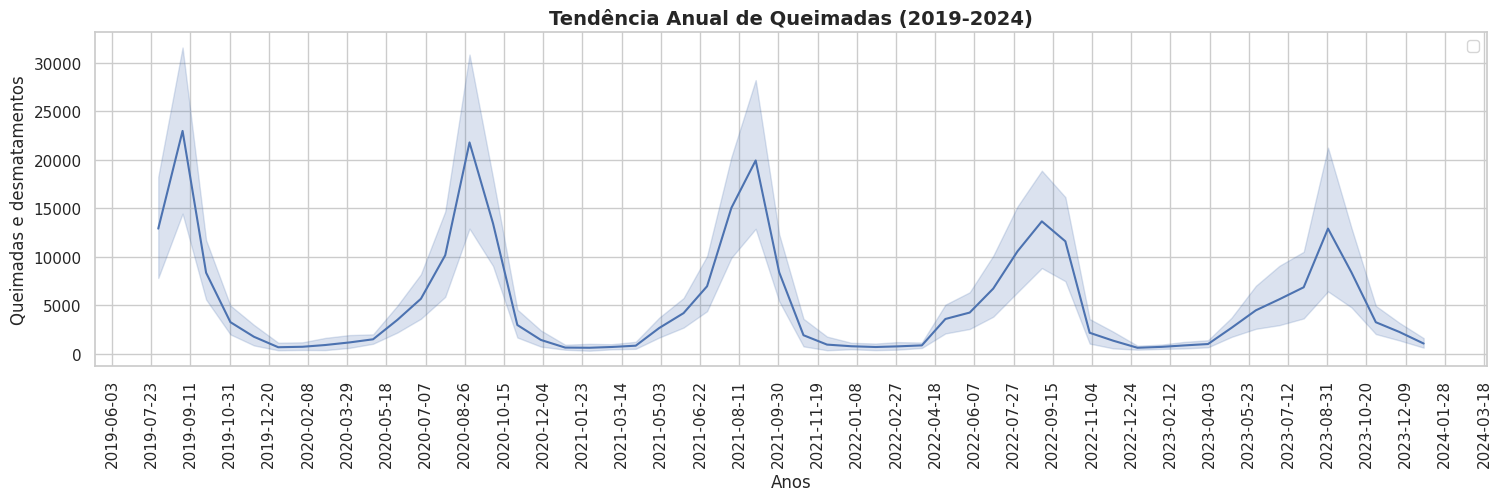

In [91]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='date', y='focuses', estimator='sum')


# Ajustar os ticks do eixo x para mostrar todos os anos no gráfico
plt.xticks(rotation=90)  # Rotaciona os labels para melhor visualização se necessário
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))  # Define um tick para cada

plt.title('Tendência Anual de Queimadas (2019-2024)', fontsize=14, fontweight=600)
plt.xlabel('Anos')
plt.ylabel('Queimadas e desmatamentos')
plt.legend() #
plt.tight_layout()
plt.show()

## 4.3. Contribuição dos Estados brasileiros

O gráfico de linha abaixo foi elaborado para representar a contribuição dos Estados brasileiros para o aumento do número de queimadas e desmatamento. Observa-se que, de 2019 a 2024, o Estado do Maranhão foi o mais atingido por esse problema, seguido pelo Tocantins e Mato Grosso. Essa análise sugere a necessidade de intervenções mais assertivas, com políticas públicas direcionadas ao combate do desmatamento nesses Estados.

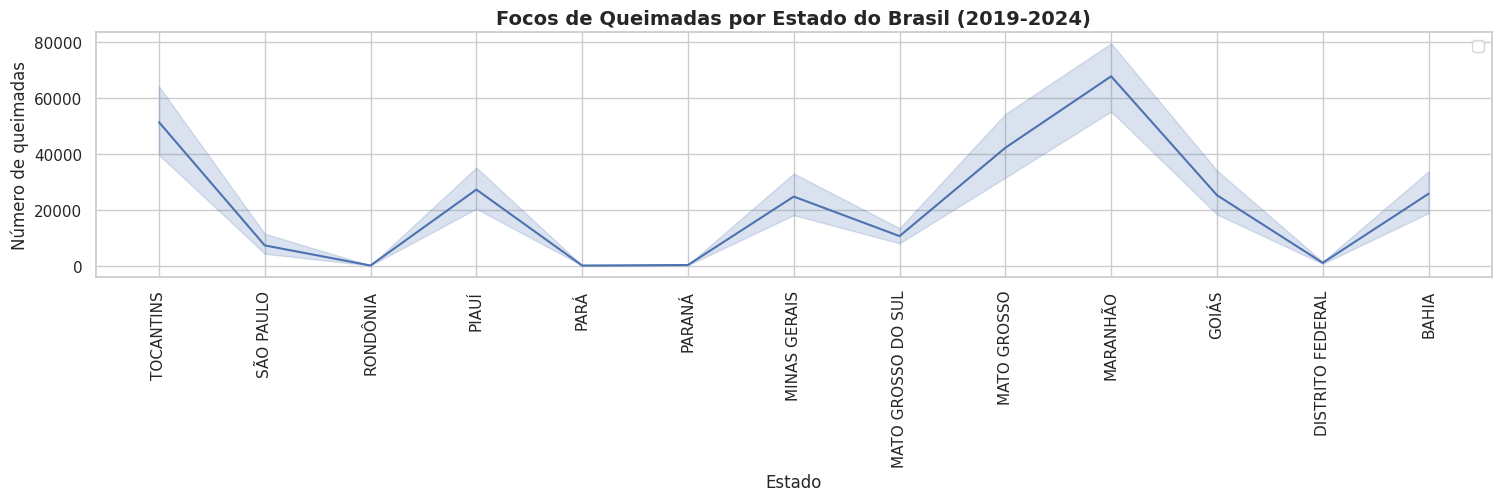

In [89]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='uf', y='focuses', estimator='sum')


# Ajustar os ticks do eixo x para mostrar todos os anos no gráfico
plt.xticks(rotation=90)  # Rotaciona os labels para melhor visualização se necessário
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Define um tick para cada

plt.title('Focos de Queimadas por Estado do Brasil (2019-2024)', fontsize=14, fontweight=600)
plt.xlabel('Estado')
plt.ylabel('Número de queimadas')
plt.legend() #
plt.tight_layout()
plt.show()

O mesmo impacto causado por esses Estados pode ser corroborado pelo gráfico de barras a seguir. Contudo, esse gráfico torna mais clara a visualização das contribuições significativas também de outros Estados, como Piauí, Minas Gerais, Mato Grosso do Sul, Goiás e Bahia, que requerem especial atenção quanto a essa problemática.

Text(0, 0.5, 'Estados brasileiros')

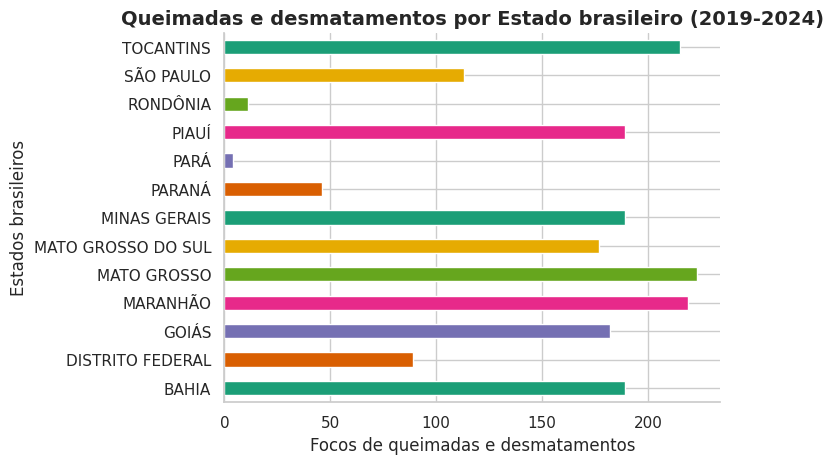

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('uf').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Queimadas e desmatamentos por Estado brasileiro (2019-2024)', fontsize=14, fontweight=600)
plt.xlabel('Focos de queimadas e desmatamentos')
plt.ylabel('Estados brasileiros')

## 4.4. Contribuição das Regiões brasileiras

Um gráfico de barras que mostra a contribuição de cada região do Brasil no desmatamento e queimadas é uma ferramenta valiosa para visualizar e entender a distribuição geográfica desses fenômenos.

Esse gráfico permite identificar facilmente que as regiões Centro Oeste e Nordeste são as que têm a maior contribuição para o desmatamento e queimadas no Brasil. Isso é crucial para concentrar esforços e recursos em áreas específicas que enfrentam maiores desafios ambientais.

Ao longo do tempo, esse gráfico de barras pode ser usado para observar as mudanças nas contribuições de cada região. Identificar tendências crescentes ou decrescentes ajuda na formulação de políticas e estratégias para abordar os problemas ambientais.

Além disso, a representação visual facilita a comparação entre diferentes regiões. Isso pode ser útil para entender disparidades geográficas e para avaliar a eficácia de medidas de conservação ou políticas ambientais em diferentes partes do país.

No aspecto científico, esse gráfico de barras proporciona uma visão clara da distribuição geográfica do desmatamento e das queimadas. Isso é valioso para cientistas, pesquisadores e formuladores de políticas que desejam entender melhor os padrões espaciais desses eventos.

Gráficos visuais também são poderosos para transmitir informações de forma acessível ao público em geral. O gráfico de barras criado pode ser utilizado em campanhas de conscientização para destacar as regiões que enfrentam os maiores desafios e incentivar ações para a preservação ambiental.

Text(0, 0.5, 'Regiões')

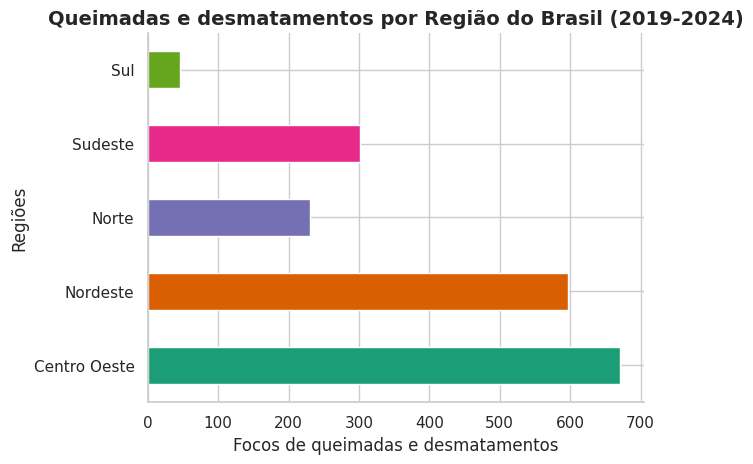

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('regiao').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Queimadas e desmatamentos por Região do Brasil (2019-2024)', fontsize=14, fontweight=600)
plt.xlabel('Focos de queimadas e desmatamentos')
plt.ylabel('Regiões')

Outra maneira interessante de analisar as participações das Regiões brasileiras nas queimadas e desmatamento é através do gráfico de violino, ou *violin plot*, como o que é apresentado a seguir. Um gráfico de violino é uma representação visual que combina características de gráficos do tipo *boxplot* com a densidade de probabilidade de uma distribuição. Ele é particularmente útil para mostrar a distribuição da contribuição de cada região do Brasil no desmatamento e queimadas, fornecendo *insights* sobre a variabilidade e a forma da distribuição.

Esse gráfico exibe a distribuição de dados para cada região, permitindo observar a variabilidade nos níveis de desmatamento e queimadas. A largura do "violino" em diferentes partes do gráfico representa a densidade de casos em diferentes valores, dando uma ideia da dispersão dos dados.

A forma do "violino" para diferentes regiões pode ser comparada visualmente. Isso é útil para identificar diferenças na distribuição, como regiões com maior variabilidade, assimetria ou concentração em faixas específicas. A área do "violino" em diferentes pontos representa a densidade de probabilidade dos dados. Regiões mais largas indicam maior densidade, enquanto regiões mais estreitas indicam menor densidade. Isso é particularmente útil quando há sobreposição de distribuições.

O *violin plot* pode revelar padrões na distribuição dos dados. Por exemplo, uma região com um "violino" mais largo em uma determinada faixa pode indicar maior variabilidade, enquanto um "violino" mais estreito pode sugerir maior concentração em valores específicos.

Assim como em um *boxplot*, o *violin plot* inclui uma linha que representa a mediana e caixas que indicam os quartis. Isso fornece informações sobre a posição central dos dados e a dispersão em torno da mediana.

<ipython-input-93-3bfb1c5e97cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='focuses', y='regiao', inner='box', palette='Dark2')


Text(0, 0.5, 'Regiões')

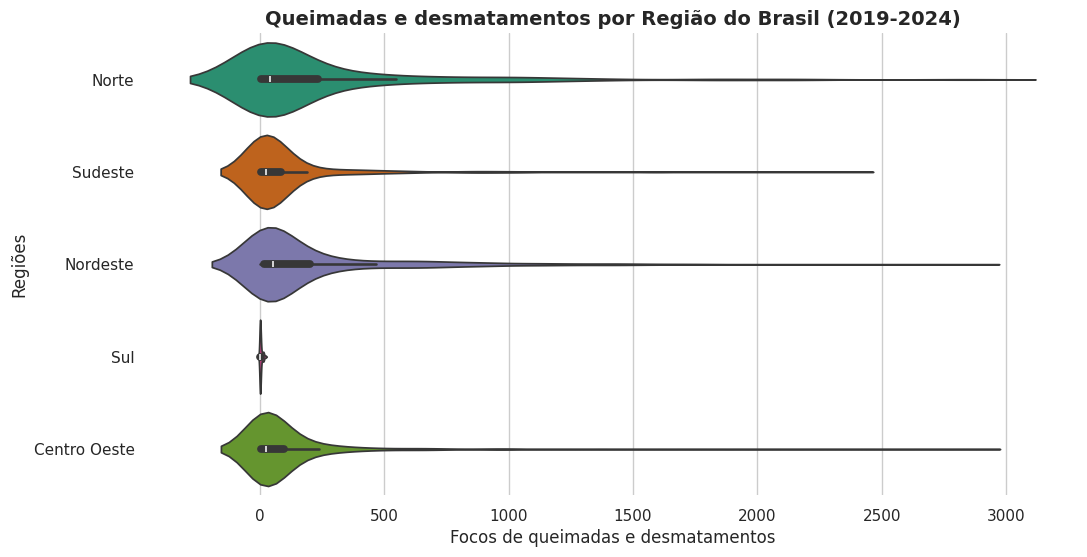

In [93]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['regiao'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='focuses', y='regiao', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Queimadas e desmatamentos por Região do Brasil (2019-2024)', fontsize=14, fontweight=600)
plt.xlabel('Focos de queimadas e desmatamentos')
plt.ylabel('Regiões')

## 4.5. Classificação dos focos de queimada por tipo de floresta

A classificação que associa os focos de queimada em vegetação às áreas de floresta, desmatamento recente, desmatamento consolidado, ou áreas de vegetação primária e vegetação secundária é valiosa por várias razões.

Inicialmente, essa classificação ajuda a monitorar e avaliar as áreas afetadas pelos focos de queimada em diferentes contextos. Isso permite uma compreensão mais detalhada das características específicas dessas áreas.

Ao categorizar os focos de queimada em tipos específicos de vegetação, é possível identificar padrões e tendências associadas a diferentes coberturas de solo. Isso pode ser crucial para entender os fatores subjacentes às queimadas e desenvolver estratégias eficazes de prevenção.

A classificação ajuda na priorização de ações de conservação e manejo. Por exemplo, áreas de floresta primária podem exigir estratégias de conservação diferentes das áreas de desmatamento recente. A compreensão dessas diferenças facilita o desenvolvimento de abordagens mais direcionadas.

Além disso, essa classificação permite uma análise mais precisa do impacto das queimadas em diferentes tipos de vegetação. Isso é vital para avaliar o dano ambiental e as consequências para a biodiversidade, o ciclo hidrológico e outros processos ecossistêmicos. O gráfico de barras a seguir permite visualizar os ecossistemas mais impactados pelas queimadas e desmatamentos.



Text(0, 0.5, 'Classe')

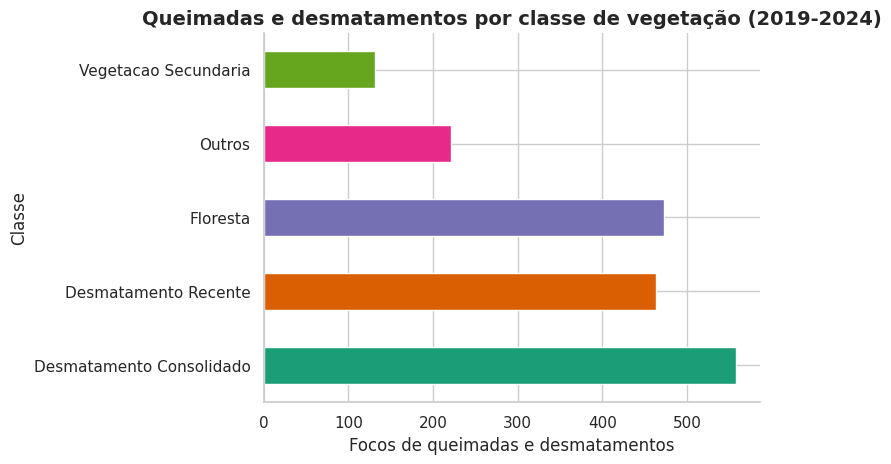

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Queimadas e desmatamentos por classe de vegetação (2019-2024)', fontsize=14, fontweight=600)
plt.xlabel('Focos de queimadas e desmatamentos')
plt.ylabel('Classe')

O *violin plot* a seguir permite a visualização da dispersão dos dados relacionados às classes de vegetação.

<ipython-input-102-f133cadf4a7e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='focuses', y='class', inner='box', palette='Dark2')


Text(0, 0.5, 'Classe')

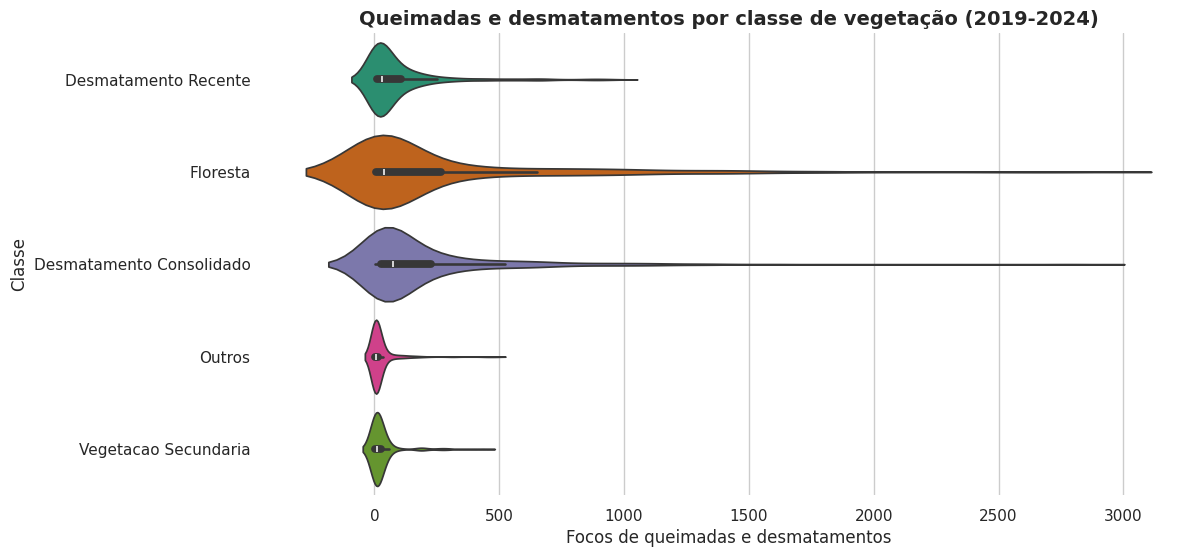

In [102]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='focuses', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Queimadas e desmatamentos por classe de vegetação (2019-2024)', fontsize=14, fontweight=600)
plt.xlabel('Focos de queimadas e desmatamentos')
plt.ylabel('Classe')

Outra análise interessante é a relação entre cada região brasileira e as classes de ecossistemas identificados, através do gráfico de calor a seguir. Essa análise fornece informações valiosas para o desenvolvimento de políticas públicas direcionadas. A diferenciação entre áreas de floresta, desmatamento recente, desmatamento consolidado e vegetação primária ou secundária ajuda os tomadores de decisão a desenvolver estratégias eficazes para a gestão sustentável do território.

Text(66.25, 0.5, 'Região')

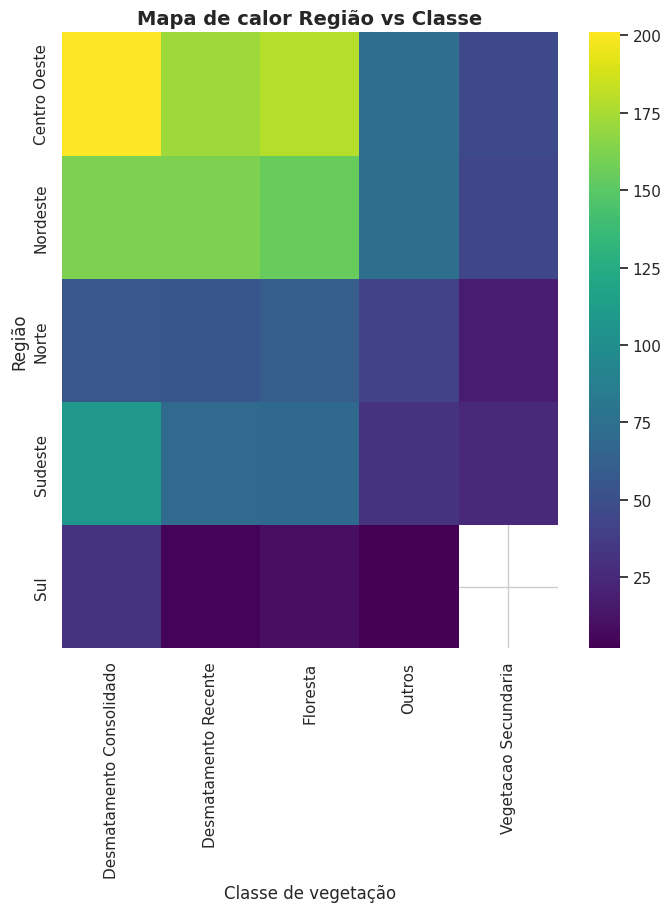

In [108]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['regiao'].value_counts()
    for x_label, grp in df.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.title('Mapa de calor Região vs Classe', fontsize=14, fontweight=600)
plt.xlabel('Classe de vegetação')
plt.ylabel('Região')

O gráfico de setor a seguir mostra a contribuição percentual do desmatamento por região brasileira. Ao identificar as áreas afetadas pelos focos de queimada em diferentes estágios de vegetação, é possível planejar a recuperação e restauração de maneira mais eficiente. Isso pode incluir ações específicas para promover o reflorestamento em áreas de desmatamento recente ou a regeneração natural em áreas de vegetação secundária.

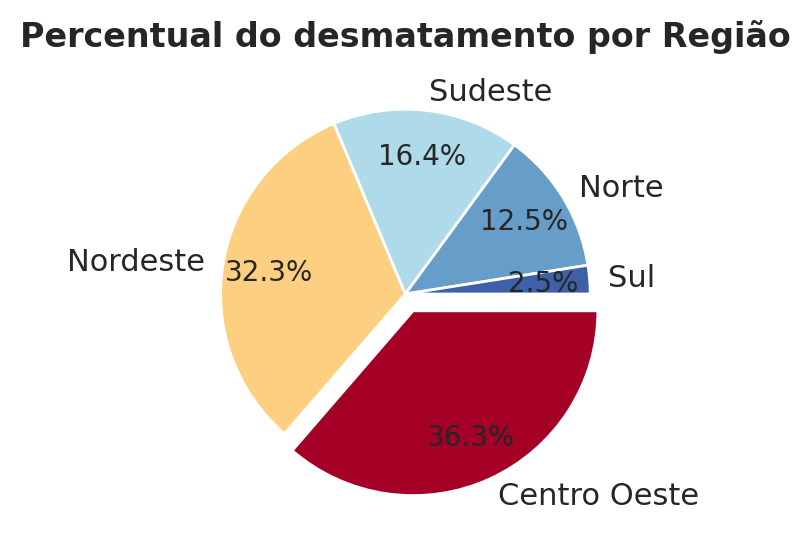

In [124]:
plt.rcParams.update({"font.size": 10})
cores = ["#A50026", "#FDD081", "#AEDAE9", "#679DC9", "#3E60A9"]
separacao_fatia = (0.1, 0, 0, 0, 0)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(3, 3), dpi=200)

ax1.pie(
    distribuicao_regiao.values.flatten(),
    labels=distribuicao_regiao.index,
    autopct="%1.1f%%",
    pctdistance=0.75,
    counterclock=False,
    colors=cores,
    explode=separacao_fatia
)

ax1.set_title("Percentual do desmatamento por Região", fontsize=12, fontweight=600)
plt.show()

# **5. Considerações finais**

Este projeto proporcionou uma visão abrangente e detalhada sobre a evolução temporal, a contribuição dos Estados e das Regiões brasileiras, bem como a classificação dos focos de queimada e desmatamento em diferentes tipos de vegetação. Ao explorar os dados provenientes do Portal TerraBrasilis, adotando métodos estatísticos e ferramentas visuais, foram obtidos *insights* valiosos que podem orientar estratégias de conservação e gestão sustentável do território.

A análise exploratória dos dados revelou que, ao longo do período de 2019 a 2024, o número médio de focos de queimada e desmatamento foi de aproximadamente 153.43, com uma considerável variabilidade representada pelo desvio padrão de 321.89. Essa variabilidade destaca a necessidade de abordagens diferenciadas para regiões com diferentes padrões de desmatamento.

A série temporal permitiu identificar padrões sazonais, evidenciando aumentos nos focos de queimada nos meses de julho a setembro, seguidos de diminuições nos meses mais chuvosos. Essa informação é crucial para o desenvolvimento de políticas e ações preventivas, adaptadas aos ciclos climáticos.

A análise da contribuição dos Estados indicou que o Maranhão, Tocantins e Mato Grosso foram os mais impactados pelos focos de queimada e desmatamento. A compreensão dessa distribuição geográfica direciona a necessidade de intervenções mais assertivas, com políticas públicas voltadas para esses Estados; além de outros, como Piauí, Minas Gerais, Mato Grosso do Sul, Goiás e Bahia, que apresentaram também significativos impactos ambientais.

A avaliação da contribuição das Regiões brasileiras reforçou a importância das regiões Centro Oeste e Nordeste, que lideram nas estatísticas de desmatamento e queimadas. O uso de gráficos de barras e *violin plots* permitiu uma análise mais detalhada da variabilidade nos níveis de desmatamento, identificando regiões com maior ou menor concentração de casos.

A classificação dos focos de queimada em diferentes tipos de vegetação forneceu informações valiosas sobre as áreas afetadas. A diferenciação entre floresta, desmatamento recente, desmatamento consolidado, vegetação primária e secundária possibilita estratégias mais eficazes de conservação e recuperação ambiental.

Ao considerar a relação entre cada região brasileira e as classes de ecossistemas, o projeto contribui para a formulação de políticas públicas mais direcionadas. A análise de calor destaca as áreas mais impactadas e fornece insights cruciais para a gestão sustentável do território.

Em síntese, a análise realizada fornece uma base sólida para a tomada de decisões informadas por dados, visando a conservação da Amazônia e o enfrentamento dos desafios associados ao desmatamento e às queimadas. O conhecimento gerado por este projeto é essencial para orientar ações futuras, promovendo a sustentabilidade e a preservação desse bioma fundamental para o equilíbrio ambiental global.

